In [1]:
df = spark.sql("SELECT * FROM Lakehouse_Sales.dbo.`lakehouse sales` LIMIT 1000")
display(df)

StatementMeta(, 41a33392-0b48-455e-92ca-293de23045de, 3, Finished, Available, Finished, False)

SynapseWidget(Synapse.DataFrame, ec4dd6aa-7ec1-4451-b1d6-f68597d419e7)

StatementMeta(, 41a33392-0b48-455e-92ca-293de23045de, 4, Finished, Available, Finished, False)

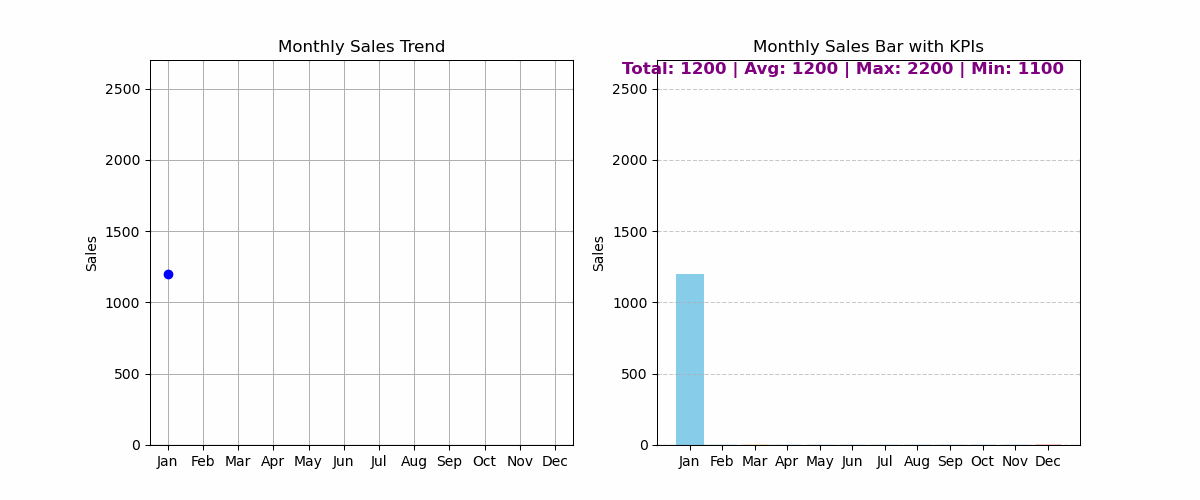

In [2]:
# notebooks/Monthly_Sales_Animation.ipynb
# Fabric Notebook: Monthly Sales Animation
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image, display
import os

# -------------------------------
# Step 1: Create dataset
# -------------------------------
os.makedirs("../dataset", exist_ok=True)
csv_path = "../dataset/monthly_sales.csv"

data = {
    "Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    "Sales": [1200,1350,1100,1600,1700,1500,1800,1750,1400,1550,2000,2200]
}
pdf = pd.DataFrame(data)
pdf.to_csv(csv_path, index=False)

# -------------------------------
# Step 2: Read dataset
# -------------------------------
pdf = pd.read_csv(csv_path)
months = pdf['Month'].tolist()
sales = pdf['Sales'].tolist()

max_sales = max(sales)
min_sales = min(sales)
max_index = sales.index(max_sales)
min_index = sales.index(min_sales)

# -------------------------------
# Step 3: Setup figure
# -------------------------------
fig, (ax_line, ax_bar) = plt.subplots(1, 2, figsize=(12,5))

# Line chart
line, = ax_line.plot([], [], marker='o', color='blue')
ax_line.set_xlim(-0.5, len(months)-0.5)
ax_line.set_ylim(0, max_sales+500)
ax_line.set_xticks(range(len(months)))
ax_line.set_xticklabels(months)
ax_line.set_title("Monthly Sales Trend")
ax_line.set_ylabel("Sales")
ax_line.grid(True)

# Bar chart
bars = ax_bar.bar(months, [0]*len(sales), color='skyblue')
ax_bar.set_ylim(0, max_sales+500)
ax_bar.set_title("Monthly Sales Bar with KPIs")
ax_bar.set_ylabel("Sales")
ax_bar.grid(axis='y', linestyle='--', alpha=0.7)
kpi_text = ax_bar.text(len(months)-0.5, max_sales+400, '', fontsize=12, fontweight='bold', color='purple', ha='right')

# -------------------------------
# Step 4: Animation function
# -------------------------------
def animate(frame):
    # Line
    line.set_data(range(frame+1), sales[:frame+1])
    
    # Bar
    for idx, bar in enumerate(bars):
        bar.set_height(sales[idx] if idx <= frame else 0)
        if idx == max_index: bar.set_color('red')
        elif idx == min_index: bar.set_color('orange')
        else: bar.set_color('skyblue')
    
    # KPI text
    current_total = sum(sales[:frame+1])
    current_avg = current_total/(frame+1)
    kpi_text.set_text(f"Total: {current_total} | Avg: {current_avg:.0f} | Max: {max_sales} | Min: {min_sales}")
    
    return [line, *bars, kpi_text]

# -------------------------------
# Step 5: Create GIF
# -------------------------------
os.makedirs("../gifs", exist_ok=True)
gif_path = "../gifs/monthly_sales_dual_animation.gif"

anim = FuncAnimation(fig, animate, frames=len(sales), interval=700, blit=True)
anim.save(gif_path, writer=PillowWriter(fps=2))
plt.close(fig)

# -------------------------------
# Step 6: Display GIF inline
# -------------------------------
display(Image(filename=gif_path))